In [5]:
from PIL import Image

import base64

import io


import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, models


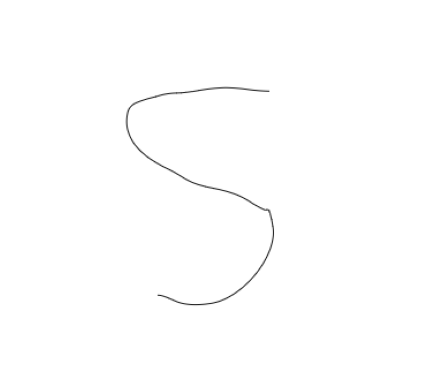

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Lire l'image
image = mpimg.imread('drawing.png')

# To PIL

image = Image.fromarray((image * 255).astype('uint8'))

transform_mnist = transforms.Compose([
    # transforms.ToTensor(),
    # Resize to 32x32
    transforms.Resize((32, 32)),
    transforms.Grayscale(num_output_channels=1),

    # To tensor
    transforms.ToTensor(),
])

image_tensor = transform_mnist(image)

# Afficher l'image
plt.imshow(image)
plt.axis('off')  # Optionnel : masquer les axes
plt.show()

In [14]:
image_tensor

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [120]:
img = Image.open("./Site/static/Test_Images/drawing.png")


buffered = io.BytesIO()
img.save(buffered, format="PNG")
image_bytes = buffered.getvalue()


encoded_image = base64.b64encode(image_bytes).decode('utf-8')


payload = {
    "image" : encoded_image,
    "name" : "drawing.png",
    "file_extension" : "png"
}

headers = {
    "Content-Type": "application/json"
}



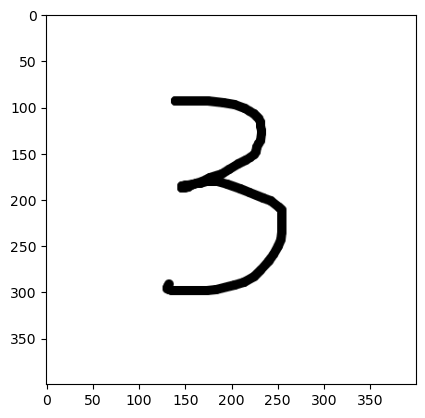

In [121]:
transform_mnist = transforms.Compose([
    # transforms.ToTensor(),
    # Resize to 32x32
    transforms.Resize((32, 32)),
    transforms.Grayscale(num_output_channels=1),

    # To tensor
    transforms.ToTensor(),
])


from matplotlib import pyplot as plt    

def show_image(image):
    plt.imshow(image, cmap='gray')
    plt.show()

show_image(img)

In [122]:
transform_mnist(img).shape

torch.Size([1, 32, 32])

In [128]:
import requests

URL = "http://127.0.0.1:5001"




def Load_Resnet():
    response = requests.get(URL + "/Loadresnet")
    if response.status_code == 200:
        print(response.json())
    else:
        print("Error: ", response.status_code)



Load_Resnet()


{'message': 'Model resnet loaded successfully'}


In [124]:

def Predict():
    response = requests.post(URL + "/Predictresnet", json=payload, headers=headers)
    if response.status_code == 200:
        print(response.json())
    else:
        print("Error: ", response.status_code)


Predict()

{'prediction': 3}


In [139]:
URL2 = "http://127.0.0.1:5000"


def Predict2():

    response = requests.get(URL2 + "/predict-image")

    if response.status_code == 200:
        print(response.json())
    else:
        print("Error: ", response.status_code)


Predict2()




{'prediction': 1}
